In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("space_data.tsv", sep = "\t")
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [3]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [4]:
len(G)

2088

In [5]:
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [6]:
get_randomwalk('space exploration', 10)

['space exploration',
 'deep space exploration',
 'interplanetary spaceflight',
 'human mission to mars',
 'nuclear thermal rocket',
 'nuclear pulse propulsion',
 'nuclear propulsion',
 'nuclear power in space',
 'nuclear electric rocket',
 'atomic age']

In [7]:
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))
        
# count of sequences
len(random_walks)

100%|██████████| 2088/2088 [00:00<00:00, 8333.35it/s]


10440

In [8]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [9]:
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(976235, 1004780)

In [10]:
model.wv.most_similar('space tourism')

[('space flight participant', 0.8224833011627197),
 ('rocketship tours', 0.7450180053710938),
 ('astronaut training', 0.7444254159927368),
 ('reduced-gravity aircraft', 0.7215607166290283),
 ('space tourism society', 0.7206845879554749),
 ('micro-g environment', 0.7083863615989685),
 ('space adventures', 0.6910893321037292),
 ('copenhagen suborbitals', 0.690981924533844),
 ('seti', 0.6728163361549377),
 ('commercial astronaut', 0.6637666821479797)]

In [11]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 
         'moon landing','space food', 'food systems on space exploration missions', 
         'meal, ready-to-eat','space law', 'metalaw', 'moon treaty', 
         'legal aspects of computing','astronaut training', 'reduced-gravity aircraft', 
         'space adaptation syndrome', 'micro-g environment']

In [12]:
def plot_nodes(word_list):
    X = model.wv[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

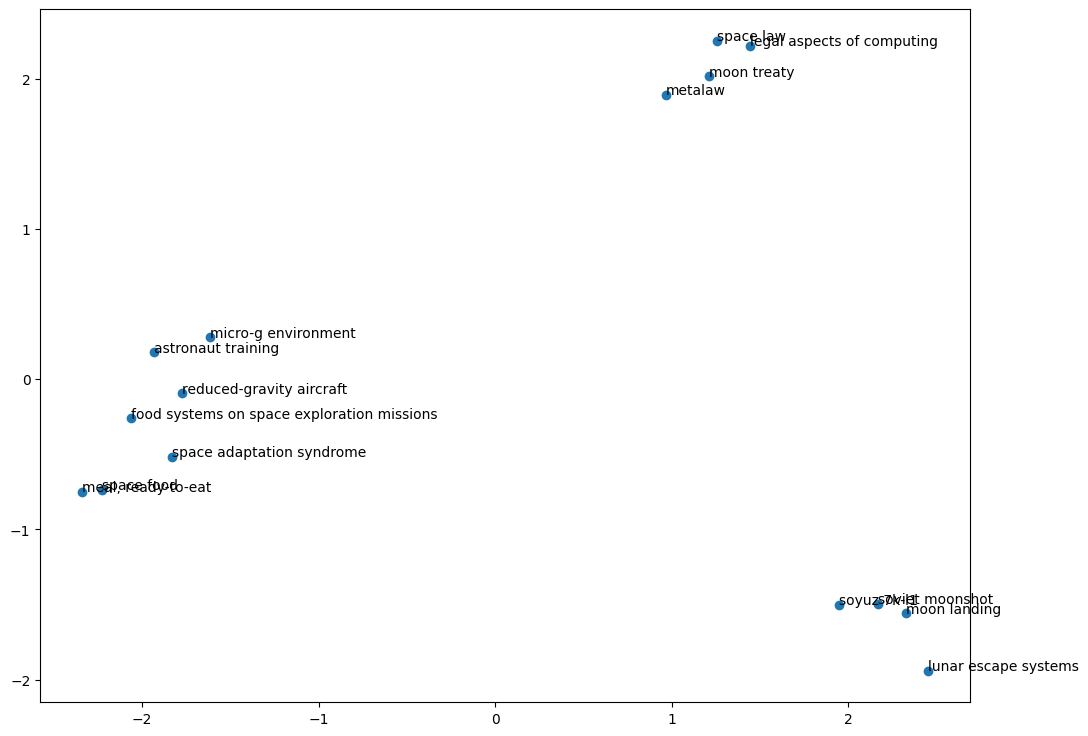

In [13]:
plot_nodes(terms)